In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

In [2]:
# generating data except for gene1,2
# parameters
num_rows = 5000 # number of samples
num_genes = 19998
min_value = 0
max_value = 1.0
n_class = 3

In [3]:
heterogeneity_list = [2, 3, 4, 5] # number of isolatablesubpopulation in population
data_overlap= 0.2 # overlap of spectrum foming gene in each subpopulation
generated_data = np.zeros((num_rows,num_genes, len(heterogeneity_list)))
for k, n_subpopulation in enumerate(heterogeneity_list):
    print(f'number of subpopulation: {n_subpopulation}')
    base_dist_range = 1./(n_class-(n_class-1)*data_overlap)
    base_dist_range2 = 1./(2 - data_overlap)
    n_pt_each_sp = num_rows//n_subpopulation
    sp_id_for_pt = np.zeros(num_rows)
    for k2 in range(n_subpopulation):
        sp_id_for_pt[k2*(n_pt_each_sp):((k2+1)*(n_pt_each_sp))] = k2
    for pt_number in range(num_rows):
        pt_class = pt_number % n_class
        min_value_gene_type1 = base_dist_range * pt_class * (1 - data_overlap)
        max_value_gene_type1 = base_dist_range * (pt_class * (1 - data_overlap) + 1.)
        gene_type1_value = np.random.uniform(min_value_gene_type1, max_value_gene_type1)
        pt_class2 = pt_class % 2
        min_value_gene_type2 = base_dist_range2 * pt_class2 * (1 - data_overlap)
        max_value_gene_type2 = base_dist_range2 * (pt_class2 * (1 - data_overlap) + 1.)
        gene_type2_value = np.random.uniform(min_value_gene_type2, max_value_gene_type2)        
        generated_data[pt_number,:, k ] = np.random.uniform(0,1, size = (num_genes,))       
        gene_id_type1 = int(0 + sp_id_for_pt[pt_number] *2)
        gene_id_type2 = int(1 + sp_id_for_pt[pt_number] *2)
        generated_data[pt_number,gene_id_type1, k ] = gene_type1_value
        generated_data[pt_number,gene_id_type2, k ] = gene_type2_value


number of subpopulation: 2
number of subpopulation: 3
number of subpopulation: 4
number of subpopulation: 5


In [4]:
pt_class = np.arange(num_rows)%n_class

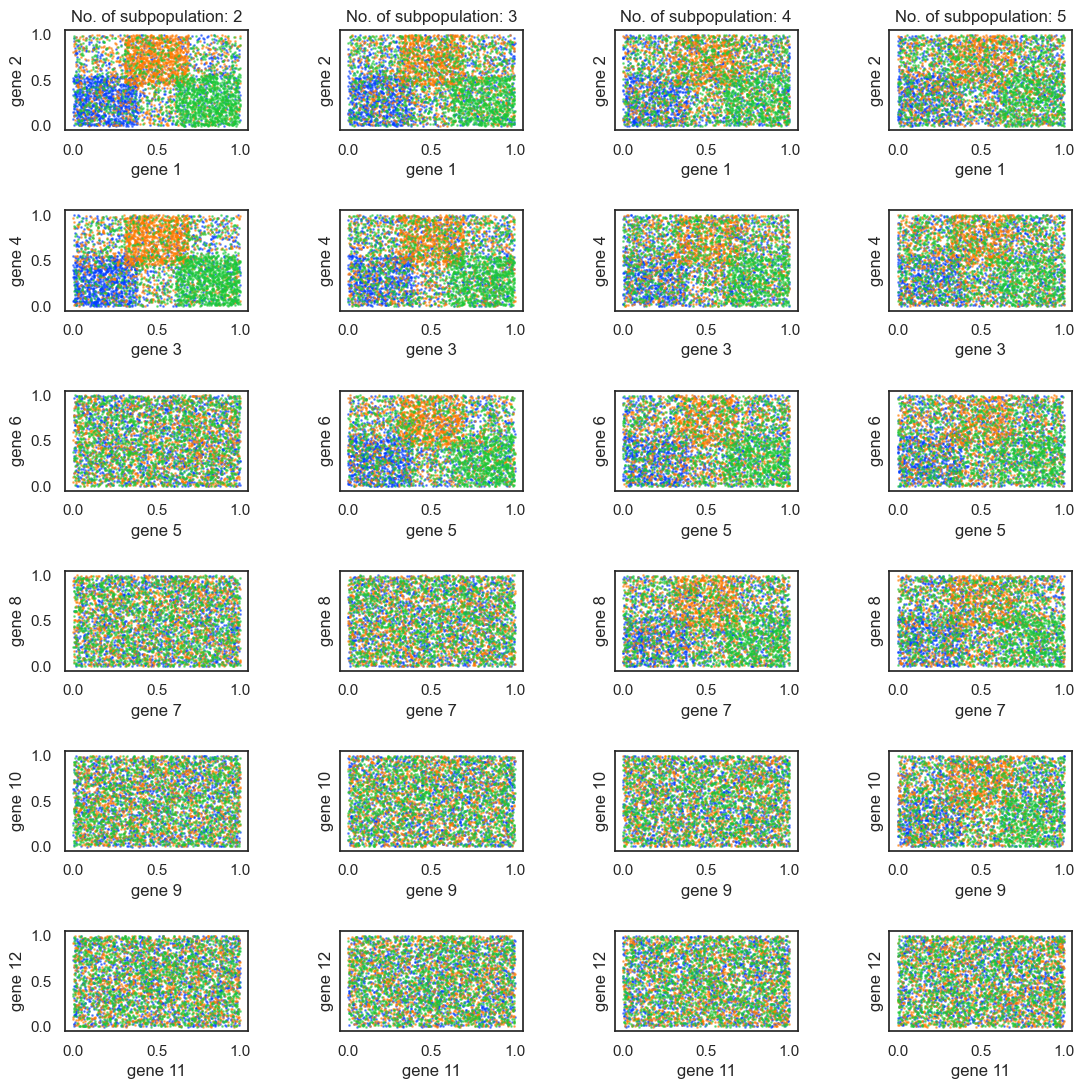

In [5]:
sns.set()
sns.set_style('white')
sns.set_palette('bright')

fig, ax = plt.subplots(len(heterogeneity_list)+2,len(heterogeneity_list), figsize=(13, 13))
fig.subplots_adjust(hspace=0.8, wspace=0.5)
for k in range(len(heterogeneity_list)):
    for k2 in range(max(heterogeneity_list)+1):
        ax_tmp=ax[k2,k]
        ax_tmp.scatter(generated_data[0::3,0+2*k2,k],generated_data[0::3,1+2*k2,k], s = 1.,alpha =0.5)
        ax_tmp.scatter(generated_data[1::3,0+2*k2,k],generated_data[1::3,1+2*k2,k], s = 1.,alpha =0.5)
        ax_tmp.scatter(generated_data[2::3,0+2*k2,k],generated_data[2::3,1+2*k2,k], s = 1.,alpha =0.5)
        if k2 == 0:
            ax_tmp.set_title(f"No. of subpopulation: {heterogeneity_list[k]}")
        ax_tmp.set_xlabel(f'gene {1+2*k2}')
        ax_tmp.set_ylabel(f'gene {2+2*k2}')

        if k == 0:
            pass
        else:
            ax_tmp.tick_params(labelleft=False)


<Figure size 640x480 with 0 Axes>

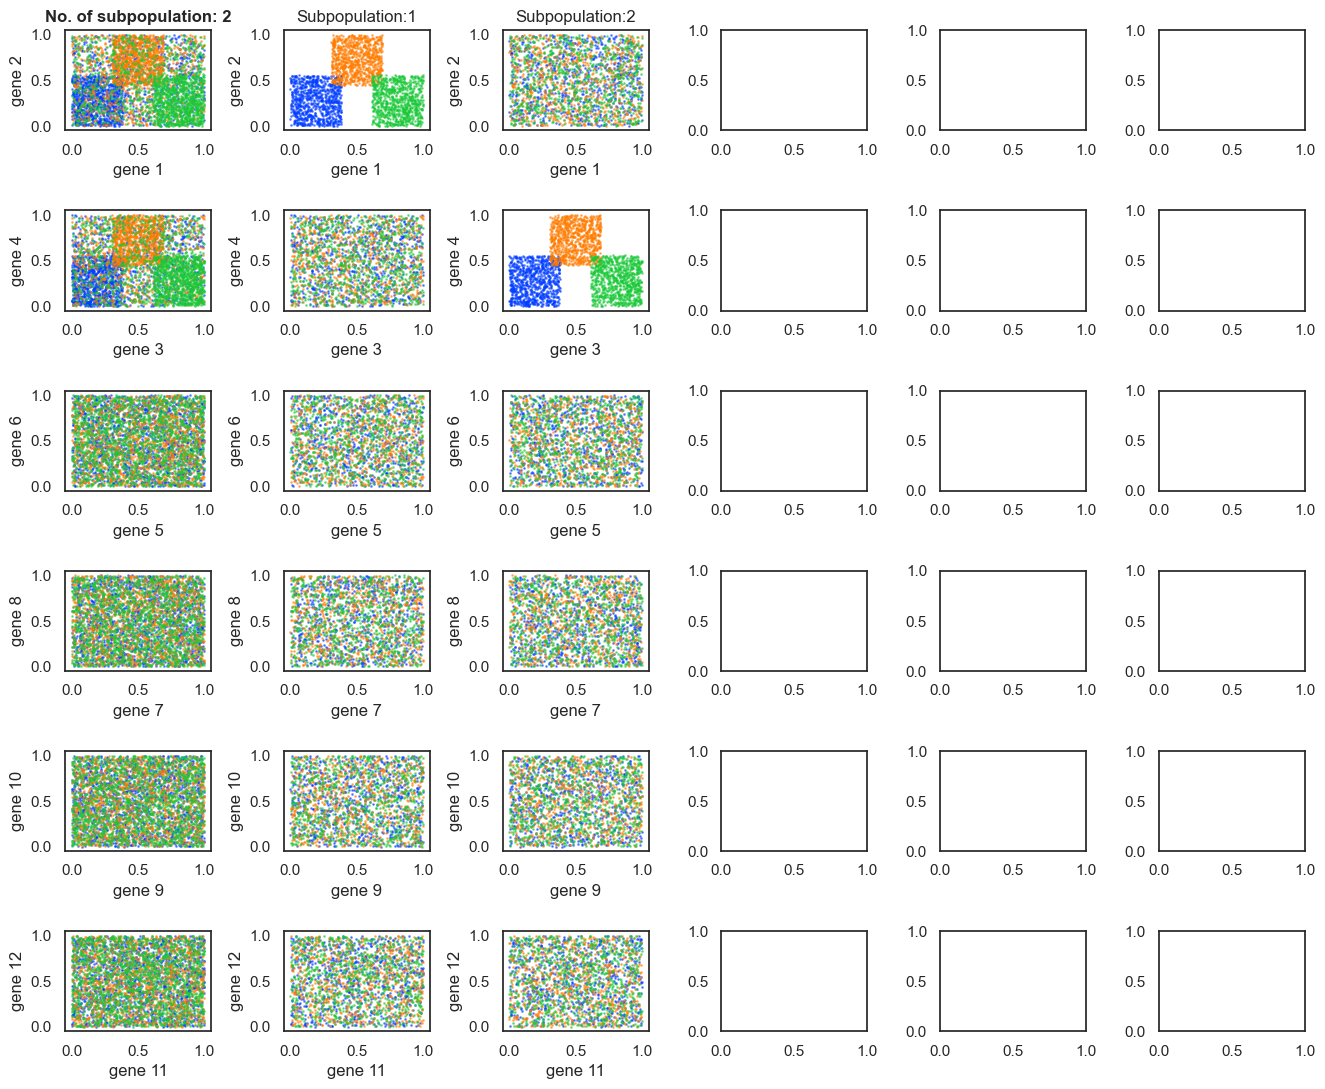

<Figure size 640x480 with 0 Axes>

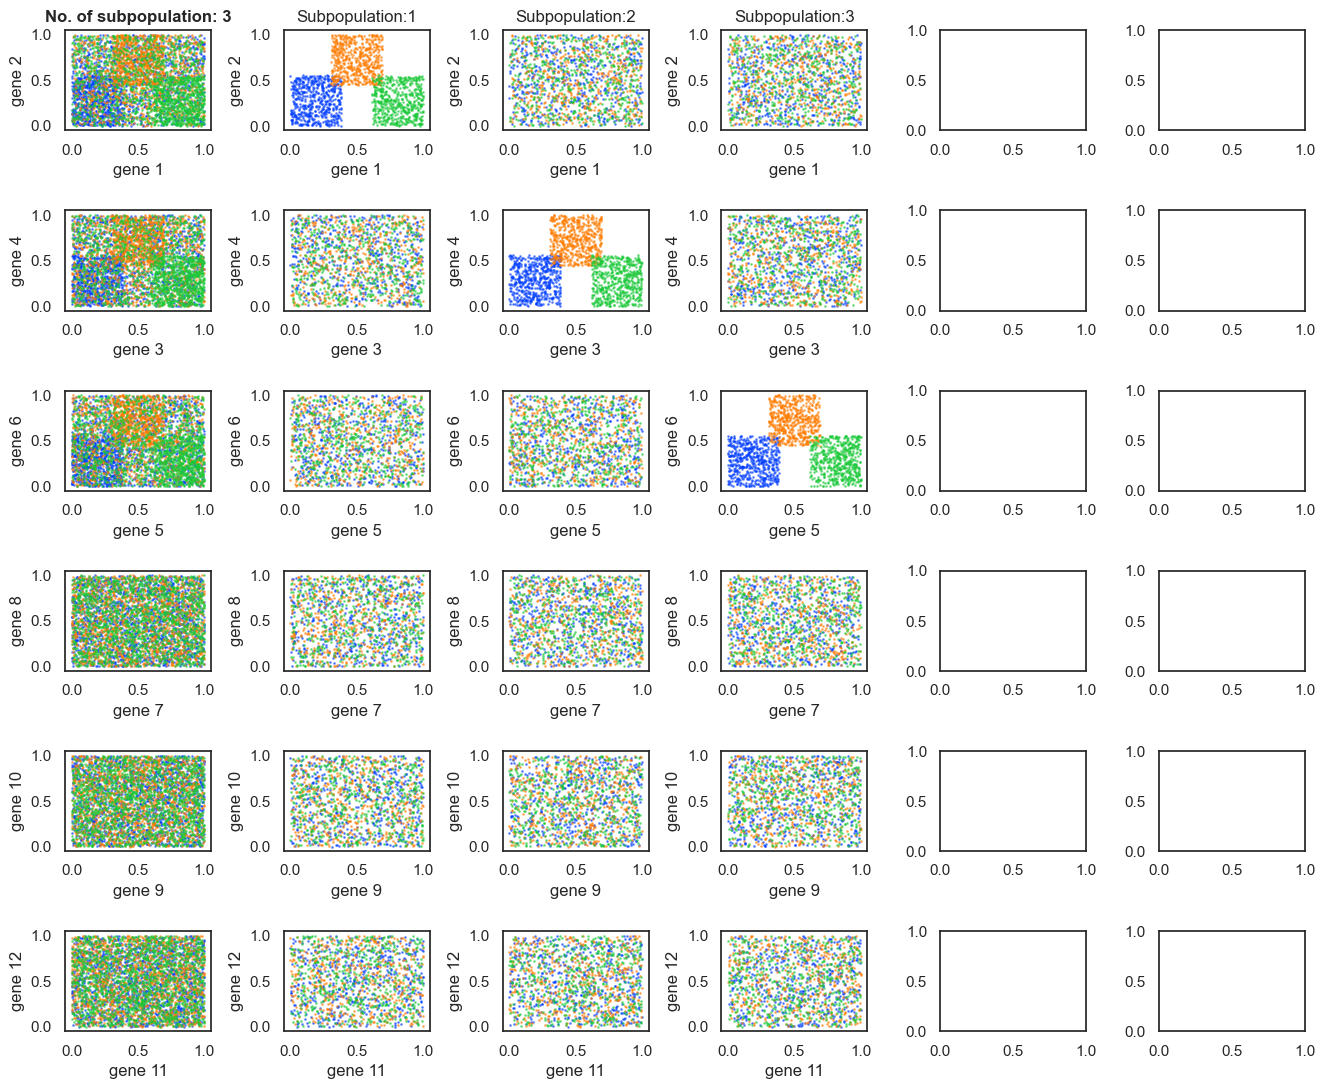

<Figure size 640x480 with 0 Axes>

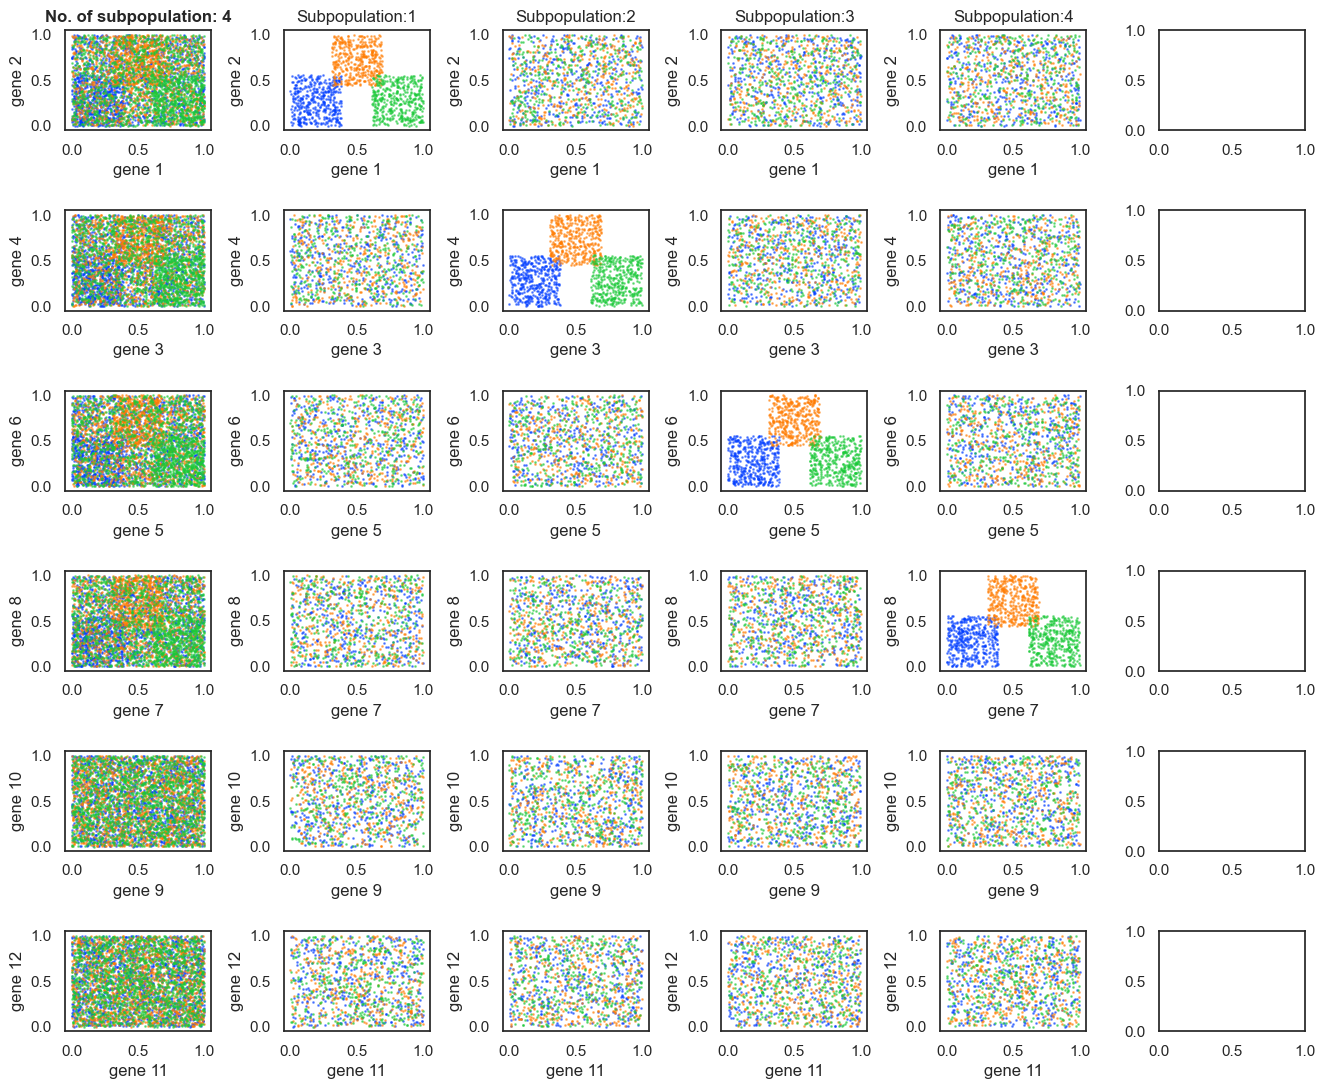

<Figure size 640x480 with 0 Axes>

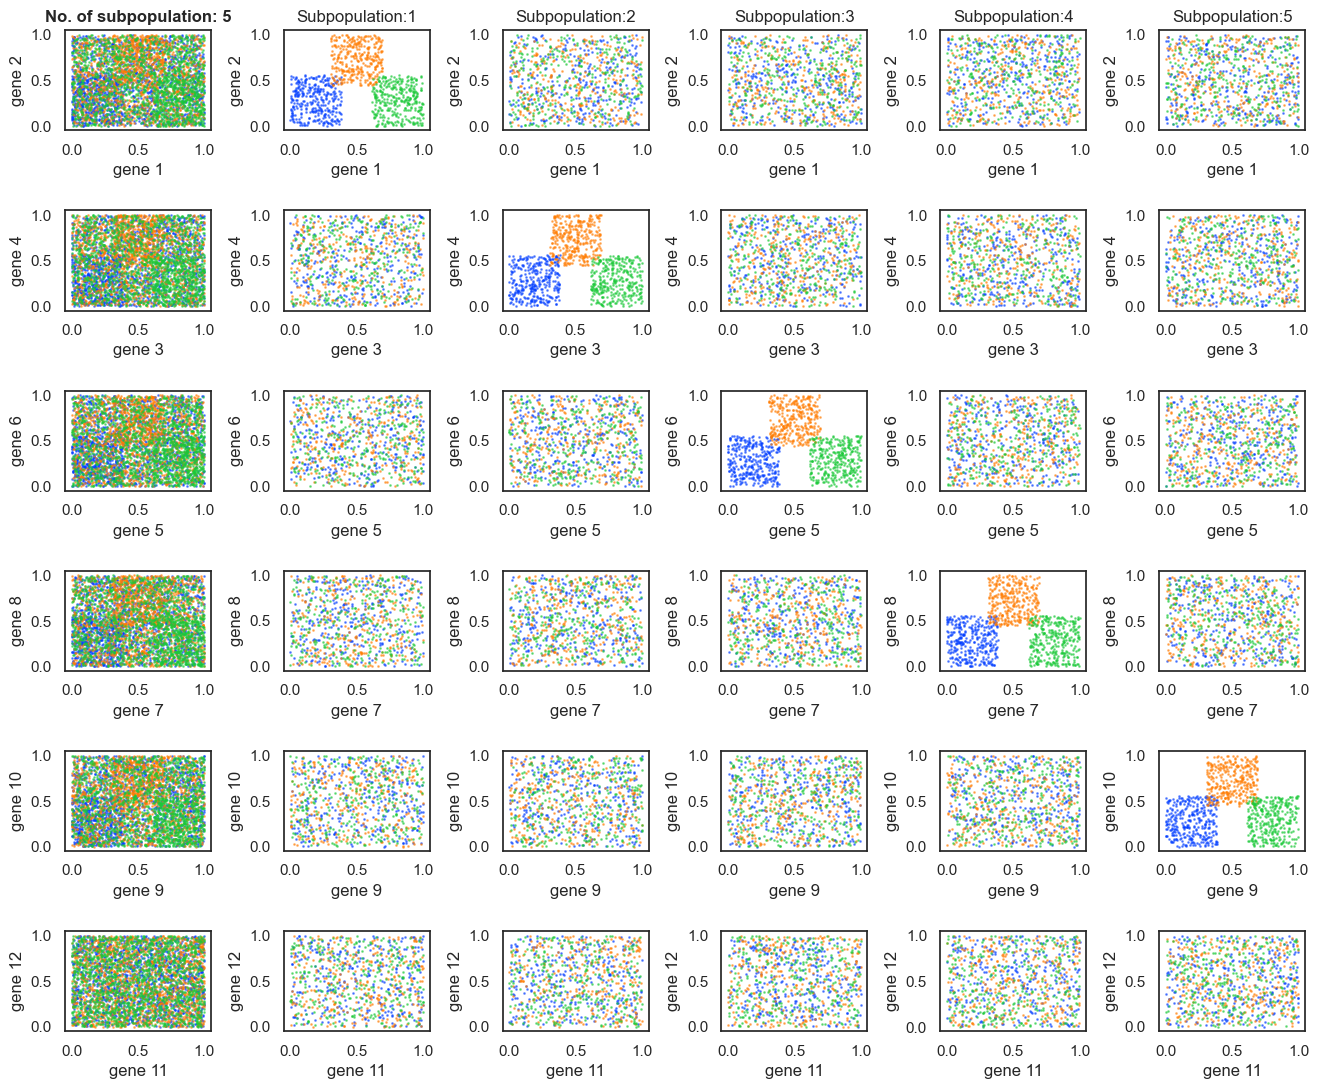

In [6]:
sns.set()
sns.set_style('white')
sns.set_palette('bright')

sp_id_for_pt = np.zeros(num_rows)
for k2 in range(n_subpopulation):
    sp_id_for_pt[k2*(n_pt_each_sp):((k2+1)*(n_pt_each_sp))] = k2


for k, n_subpopulation in enumerate(heterogeneity_list):
    plt.figure()
    fig, ax = plt.subplots(len(heterogeneity_list)+2,max(heterogeneity_list)+1, figsize=(16, 13))
    fig.subplots_adjust(hspace=0.8, wspace=0.5)
    n_pt_each_sp = num_rows//n_subpopulation
    sp_id_for_pt = np.zeros(num_rows)
    for k2 in range(max(heterogeneity_list)+1):
        ax[k2,0].scatter(generated_data[0::3,0+2*k2,k],generated_data[0::3,1+2*k2,k], s = 1.,alpha =0.5)
        ax[k2,0].scatter(generated_data[1::3,0+2*k2,k],generated_data[1::3,1+2*k2,k], s = 1.,alpha =0.5)
        ax[k2,0].scatter(generated_data[2::3,0+2*k2,k],generated_data[2::3,1+2*k2,k], s = 1.,alpha =0.5)
        ax[k2,0].set_xlabel(f'gene {1+2*k2}')
        ax[k2,0].set_ylabel(f'gene {2+2*k2}')
        if k2==0:
            ax[k2,0].set_title(f"No. of subpopulation: {heterogeneity_list[k]}",fontweight='bold')

        for k3 in range(n_subpopulation):
            sp_id_for_pt[k3*(n_pt_each_sp):((k3+1)*(n_pt_each_sp))] = k3
        for k3 in range(n_subpopulation):
            ax[k2,k3+1].scatter(generated_data[(sp_id_for_pt==k3)&(np.arange(0,num_rows)%3==0),0+2*k2,k],
                                generated_data[(sp_id_for_pt==k3)&(np.arange(0,num_rows)%3==0),1+2*k2,k], s = 1.,alpha =0.5)
            ax[k2,k3+1].scatter(generated_data[(sp_id_for_pt==k3)&(np.arange(0,num_rows)%3==1),0+2*k2,k],
                                generated_data[(sp_id_for_pt==k3)&(np.arange(0,num_rows)%3==1),1+2*k2,k], s = 1.,alpha =0.5)
            ax[k2,k3+1].scatter(generated_data[(sp_id_for_pt==k3)&(np.arange(0,num_rows)%3==2),0+2*k2,k],
                                generated_data[(sp_id_for_pt==k3)&(np.arange(0,num_rows)%3==2),1+2*k2,k], s = 1.,alpha =0.5)
            ax[k2,k3+1].set_xlabel(f'gene {1+2*k2}')
            ax[k2,k3+1].set_ylabel(f'gene {2+2*k2}')
            if k2==0:
                ax[k2,k3+1].set_title(f"Subpopulation:{k3+1}")
                    

In [7]:
#importing library
import warnings
warnings.filterwarnings('ignore')
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [8]:
from typing import Optional, List, Tuple
# multiclass_log_loss for LGBM 

class MultiLoglossForLGBM:
    
    def __init__(self, n_class: int=3, use_softmax: bool=True, epsilon: float=1e-32, grand_truth=np.empty(0)) -> None:
        # initialize        
        self.name = "SFC_loss"
        self.grand_truth = grand_truth
        self.n_class = n_class
        self.prob_func = self._get_prob_value if use_softmax else lambda x: x
        self.epsilon = epsilon
    
    def __call__(self, preds: np.ndarray, labels: np.ndarray, weight: Optional[np.ndarray]=None) -> float:
        #calculate loss function
        #get prob value by softmax
        prob = self.prob_func(preds)           # <= from logits to probability
        #convert labels to 1-hot
        labels = self._get_1hot_label(labels)  # <= labels (1D-array) to 1hot
        loss_by_sample = np.sum(- np.log(prob) * labels, axis=1)
        loss = np.average(loss_by_sample, weight)
        
        return loss
    
    def _calc_grad_and_hess(
        self, preds: np.ndarray, labels: np.ndarray, weight: Optional[np.ndarray]=None
    ) -> Tuple[np.ndarray]:
        """Calc Grad and Hess"""
        # # get prob value by softmax
        prob = self.prob_func(preds)           # <= margin を確率値に直す
        # # convert labels to 1-hot
        labels = self._get_1hot_label(labels)  # <= labels (1D-array) to 1hot label

        grad = prob - labels
        hess = prob * (1 - prob)        
        if weight is not None:
            grad = grad * weight[:, None]
            hess = hess * weight[:, None]
        return grad, hess
    
    def return_loss(self, preds: np.ndarray, data: lgb.Dataset) -> Tuple[str, float, bool]:
        """Return Loss for lightgbm"""
        labels = data.get_label()
        weight = data.get_weight()
        n_example = len(labels)
        
        # # reshape preds: (n_class * n_example,) => (n_class, n_example) =>  (n_example, n_class)
        preds = preds.reshape(self.n_class, n_example).T  # <= preds (1D-array) to 2D-array 
        # # calc loss
        loss = self(preds, labels, weight)
        
        return self.name, loss, False
    
    def return_grad_and_hess(self, preds: np.ndarray, data: lgb.Dataset) -> Tuple[np.ndarray]:
        """Return Grad and Hess for lightgbm"""
        labels = data.get_label()
        weight = data.get_weight()
        n_example = len(labels)
        
        # # reshape preds: (n_class * n_example,) => (n_class, n_example) =>  (n_example, n_class)
        preds = preds.reshape(self.n_class, n_example).T  # <= preds (1D-array) to 2D-array 
        # # calc grad and hess.
        grad, hess =  self._calc_grad_and_hess(preds, labels, weight)

        # # reshape grad, hess: (n_example, n_class) => (n_class, n_example) => (n_class * n_example,) 
        grad = grad.T.reshape(n_example * self.n_class)   # <= return 1D-array 
        hess = hess.T.reshape(n_example * self.n_class)   # <= return 1D-array 
        
        return grad, hess
    
    def softmax(x):
        return np.exp(x)/np.sum(np.exp(x))
    
    def _get_prob_value(self, preds: np.ndarray) -> np.ndarray:
        """Convert Margin(Logit) to Prob by Softmax."""
        upper = np.exp(preds)
        prob = upper / np.sum(upper, axis=1, keepdims=True)
        prob = np.clip(prob, self.epsilon, 1 - self.epsilon)
        
        return prob
    
    
    def _get_1hot_label(self, labels: np.ndarray) -> np.ndarray:
        """Convert labels to 1hot array."""
        n_example = len(labels)
        #make a matrix here
        onehot = np.zeros((n_example, self.n_class))
        #setting overlap
        original_array=self.grand_truth
        for index, j in enumerate(labels):
            if self.grand_truth.shape[0]==0:
                onehot[index, int(j)] =1
            else:
                onehot[index,:]=original_array[int(j)]
        return onehot

In [9]:
# annotating
data_df_test = pd.DataFrame(generated_data[:,:,-1])
data_df_test['patient'] = pt_class

# data split and standardalization
x_gbm = data_df_test.drop('patient', axis = 1).values
y_gbm = pt_class #data_df_test['patient'].values
sc = StandardScaler()
sc.fit(x_gbm)
x_gbm = sc.transform(x_gbm)

# small scale data prep for hyper parameter tuning by optuna
x_gbm_small = x_gbm[::23,:]
y_gbm_small = y_gbm[::23]

n_splits = 5

# parameters optimization using optuna
def objective(trial):
    # Set LightGBM hyperparameters using Optuna
    param = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_class': 3,
        'num_iteration': 500,
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    }

    # Set 5-fold cross-validation
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state = 2025)

    # List to save cross-validation results
    cv_results = []

    # Train and evaluate the model for each fold
    for train_idx, valid_idx in cv.split(x_gbm_small, y_gbm_small):
        X_train, X_valid = x_gbm[train_idx], x_gbm[valid_idx]
        y_train, y_valid = y_gbm[train_idx], y_gbm[valid_idx]
        
        lgb_train = lgb.Dataset(X_train, label = y_train)
        lgb_valid = lgb.Dataset(X_valid, label = y_valid, reference = lgb_train)
        
        gbm = lgb.train(param,
                        lgb_train,
                        valid_sets = [lgb_train, lgb_valid],
                        early_stopping_rounds = 70,
                        verbose_eval = False)
        y_pred = gbm.predict(X_valid, num_iteration=gbm.best_iteration)
        y_pred_max = np.argmax(y_pred, axis=1)
        cv_results.append(accuracy_score(y_valid, y_pred_max))

    # Return the minimum accuracy from cross-validation
    return np.mean(cv_results)

# Create an Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Output the best hyperparameters
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))

print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2025-06-12 09:05:16,631] A new study created in memory with name: no-name-3fac61bc-f6b9-4c3a-9777-45c23081c3d9
[I 2025-06-12 09:07:17,723] Trial 0 finished with value: 0.9266384778012684 and parameters: {'lambda_l1': 2.6102331334792888e-06, 'lambda_l2': 6.927944956223782e-08, 'num_leaves': 57, 'feature_fraction': 0.6360833207498244, 'bagging_fraction': 0.901332947499227, 'bagging_freq': 6, 'min_child_samples': 27, 'learning_rate': 0.001945632688687439}. Best is trial 0 with value: 0.9266384778012684.
[I 2025-06-12 09:09:09,805] Trial 1 finished with value: 0.931183932346723 and parameters: {'lambda_l1': 6.524874907751178e-06, 'lambda_l2': 0.04480821831058013, 'num_leaves': 34, 'feature_fraction': 0.6179404556780297, 'bagging_fraction': 0.9826203017591404, 'bagging_freq': 4, 'min_child_samples': 25, 'learning_rate': 0.0030535055305313755}. Best is trial 1 with value: 0.931183932346723.
[I 2025-06-12 09:09:17,916] Trial 2 finished with value: 0.3256871035940804 and parameters: {'lambd

Best trial:
  Value: 0.9541226215644821
  Params: 
    lambda_l1: 0.0010594837308910087
    lambda_l2: 2.4842665723411326
    num_leaves: 105
    feature_fraction: 0.6915116579516776
    bagging_fraction: 0.9391048277449666
    bagging_freq: 7
    min_child_samples: 49
    learning_rate: 0.022919437340785314


In [10]:
# divide dataset
n_splits = 5
feature_names = [f"gene {i+1}" for i in range(num_genes)]
CV_names = [f"CV{i}" for i in range(n_splits)]
heteroN = [f"heteroN {i}" for i in heterogeneity_list]
df_importance_GC_mean = pd.DataFrame(columns = heteroN, index = feature_names)
df_importance_GC_std = pd.DataFrame(columns = heteroN, index = feature_names)
df_importance_SFC_mean = pd.DataFrame(columns = heteroN, index = feature_names)
df_importance_SFC_std = pd.DataFrame(columns = heteroN, index = feature_names)
df_importance_Diff_mean = pd.DataFrame(columns = heteroN, index = feature_names)
df_importance_Diff_std = pd.DataFrame(columns = heteroN, index = feature_names)

# lightBGM hyper parameter
best_params = trial.params.copy()
best_params.update({
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_class': 3,
    'num_iteration': 500,
    'verbosity': -1,
    'early_stopping_rounds': 100,
    'importance_type': 'gain',
    'seed': 42
})

# hyperparameter setting for overlap assumption in the model
overlap_w = 0.05
grand_truth_SFC = np.array([[1.-overlap_w,overlap_w,0],[overlap_w,1.-2*overlap_w,overlap_w],[0,overlap_w,1.-overlap_w]])

# placeholder for data to be obtained
array_acc = np.zeros((2,n_splits,len(heterogeneity_list)))
array_importance_GC= np.zeros((num_genes,n_splits,len(heterogeneity_list)))
array_importance_SFC = np.zeros((num_genes,n_splits,len(heterogeneity_list)))
array_importance_Diff = np.zeros((num_genes,n_splits,len(heterogeneity_list)))

for spN_id, n_subpopulation in tqdm(enumerate(heterogeneity_list), total=len(heterogeneity_list)):
    df_acc = pd.DataFrame(columns=CV_names, index=['GC','SFC'])
    df_importance_GC = pd.DataFrame(columns=CV_names, index=feature_names)
    df_importance_SFC = pd.DataFrame(columns=CV_names, index=feature_names)
    df_importance_Diff = pd.DataFrame(columns=CV_names, index=feature_names)

    # annotating
    data_df_test = pd.DataFrame(generated_data[:,:,spN_id])
    data_df_test['patient'] = pt_class

    # data split and standardalization
    x_gbm = data_df_test.drop('patient', axis = 1).values
    y_gbm = pt_class #data_df_test['patient'].values
    sc = StandardScaler()
    sc.fit(x_gbm)
    x_gbm = sc.transform(x_gbm)
    x_train_gbm, x_test_gbm, y_train_gbm, y_test_gbm = train_test_split(x_gbm, y_gbm, test_size=0.2, shuffle = True, random_state=2022, stratify=y_gbm)
    # val data for classification
    x_tr, x_va, y_tr, y_va = train_test_split(x_train_gbm, y_train_gbm, test_size=0.2, shuffle = True, random_state=2022, stratify=y_train_gbm)


    cv = list(StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2025).split(x_gbm, y_gbm))
    # CV loop
    for nfold, (train_index, valid_index) in enumerate(cv):
        print("-"*20, f"subpopID: {spN_id}, cv: {nfold}", "-"*20)
        x_tr, y_tr = x_gbm[train_index], y_gbm[train_index]
        x_va, y_va = x_gbm[valid_index], y_gbm[valid_index]

        # define lgb dataset
        lgb_train = lgb.Dataset(x_tr, label = y_tr)
        lgb_eval = lgb.Dataset(x_va, label = y_va, reference = lgb_train)

        print("-"*20, "GC model learning", "-"*20)


        # model training
        evaluation_results={}
        model_GC = lgb.train(best_params,
                            train_set=lgb_train,
                            valid_names=['train', 'valid'],
                            valid_sets=[lgb_train, lgb_eval],
                            evals_result=evaluation_results,
                            early_stopping_rounds = 70,
                            verbose_eval=False,
                            )

        # calculate accuracy of test data
        y_pred_prob = model_GC.predict(x_va, num_iteration = model_GC.best_iteration)
        y_pred_GC = np.argmax(y_pred_prob,axis=1)
        acc_GC = accuracy_score(y_va, y_pred_GC)
        print(f"Test data accuracy: {acc_GC}")

        # model training
        print("-"*20, "SFC model learning", "-"*20)
        evaluation_results2={}

        SFC_loss = MultiLoglossForLGBM(n_class = 3, grand_truth=grand_truth_SFC, use_softmax = True)
        model_SFC = lgb.train(best_params,
                            train_set=lgb_train,
                            valid_names=['train', 'valid'],
                            valid_sets=[lgb_train, lgb_eval],
                            evals_result=evaluation_results2,
                            fobj=SFC_loss.return_grad_and_hess,
                            feval=lambda preds, data: SFC_loss.return_loss(preds, data),
                            early_stopping_rounds = 70,
                            verbose_eval=False,
                            )

        # calculate accuracy of test data
        y_pred_prob_SFC = model_SFC.predict(x_va, num_iteration = model_SFC.best_iteration)
        y_pred_SFC = np.argmax(y_pred_prob_SFC,axis=1)
        acc_SFC = accuracy_score(y_va, y_pred_SFC)
        print(f"Test data accuracy: {acc_SFC}")

        # gain features
        f_importance_GC = np.array(model_GC.feature_importance(importance_type='gain'))
        f_importance_GC = f_importance_GC / np.sum(f_importance_GC)
        f_importance_SFC = np.array(model_SFC.feature_importance(importance_type='gain'))
        f_importance_SFC = f_importance_SFC / np.sum(f_importance_SFC)
        df_acc.at['GC',CV_names[nfold]] = acc_GC
        df_acc.at['SFC',CV_names[nfold]] = acc_SFC
        df_importance_GC[CV_names[nfold]] = f_importance_GC
        df_importance_SFC[CV_names[nfold]] = f_importance_SFC
        df_importance_Diff[CV_names[nfold]] = f_importance_SFC - f_importance_GC

    array_acc[:,:,spN_id] = df_acc.to_numpy()
    array_importance_GC[:,:,spN_id] = df_importance_GC.to_numpy()
    array_importance_SFC[:,:,spN_id]= df_importance_SFC.to_numpy()
    array_importance_Diff[:,:,spN_id]= df_importance_Diff.to_numpy()

    acc_th = 2./3.
    df_importance_GC_mean[heteroN[spN_id]] = df_importance_GC.loc[:,(df_acc>=acc_th).sum(axis=0)==2].mean(axis=1)
    df_importance_GC_std[heteroN[spN_id]]  = df_importance_GC.loc[:,(df_acc>=acc_th).sum(axis=0)==2].std(axis=1)
    df_importance_SFC_mean[heteroN[spN_id]]= df_importance_SFC.loc[:,(df_acc>=acc_th).sum(axis=0)==2].mean(axis=1)
    df_importance_SFC_std[heteroN[spN_id]] = df_importance_SFC.loc[:,(df_acc>=acc_th).sum(axis=0)==2].std(axis=1)
    df_importance_Diff_mean[heteroN[spN_id]]= df_importance_Diff.loc[:,(df_acc>=acc_th).sum(axis=0)==2].mean(axis=1)
    df_importance_Diff_std[heteroN[spN_id]] = df_importance_Diff.loc[:,(df_acc>=acc_th).sum(axis=0)==2].std(axis=1)
    del df_acc,df_importance_GC,df_importance_SFC,data_df_test

  0%|                                                     | 0/4 [00:00<?, ?it/s]

-------------------- subpopID: 0, cv: 0 --------------------
-------------------- GC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.789
-------------------- SFC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.782
-------------------- subpopID: 0, cv: 1 --------------------
-------------------- GC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.769
-------------------- SFC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.771
-------------------- subpopID: 0, cv: 2 --------------------
-------------------- GC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.773
-------------------- SFC model learning --------------------
[LightGBM] [Warning] Unknown parameter: impo

 25%|█████████▊                             | 1/4 [1:03:56<3:11:48, 3836.21s/it]

Test data accuracy: 0.782
-------------------- subpopID: 1, cv: 0 --------------------
-------------------- GC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.677
-------------------- SFC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.668
-------------------- subpopID: 1, cv: 1 --------------------
-------------------- GC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.69
-------------------- SFC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.679
-------------------- subpopID: 1, cv: 2 --------------------
-------------------- GC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.681
-------------------- SFC model learning --------------------
[LightGBM] [Warning

 50%|███████████████████▌                   | 2/4 [2:11:36<2:12:15, 3967.79s/it]

Test data accuracy: 0.667
-------------------- subpopID: 2, cv: 0 --------------------
-------------------- GC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.589
-------------------- SFC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.585
-------------------- subpopID: 2, cv: 1 --------------------
-------------------- GC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.622
-------------------- SFC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.604
-------------------- subpopID: 2, cv: 2 --------------------
-------------------- GC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.603
-------------------- SFC model learning --------------------
[LightGBM] [Warnin

 75%|█████████████████████████████▎         | 3/4 [3:22:36<1:08:21, 4101.48s/it]

Test data accuracy: 0.596
-------------------- subpopID: 3, cv: 0 --------------------
-------------------- GC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.582
-------------------- SFC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.557
-------------------- subpopID: 3, cv: 1 --------------------
-------------------- GC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.567
-------------------- SFC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.55
-------------------- subpopID: 3, cv: 2 --------------------
-------------------- GC model learning --------------------
[LightGBM] [Warning] Unknown parameter: importance_type
Test data accuracy: 0.588
-------------------- SFC model learning --------------------
[LightGBM] [Warning

100%|█████████████████████████████████████████| 4/4 [4:33:36<00:00, 4104.02s/it]

Test data accuracy: 0.539


In [11]:
df_importance_Diff_mean

heteroN 2  heteroN 3  heteroN 4  heteroN 5
gene 1       0.011415   0.024208        NaN        NaN
gene 2      -0.003925   0.007570        NaN        NaN
gene 3       0.020932   0.026486        NaN        NaN
gene 4      -0.000902   0.010305        NaN        NaN
gene 5       0.000012   0.019161        NaN        NaN
...               ...        ...        ...        ...
gene 19994  -0.000014  -0.000008        NaN        NaN
gene 19995  -0.000013   0.000011        NaN        NaN
gene 19996   0.000004  -0.000005        NaN        NaN
gene 19997   0.000002  -0.000026        NaN        NaN
gene 19998   0.000004  -0.000013        NaN        NaN

[19998 rows x 4 columns]

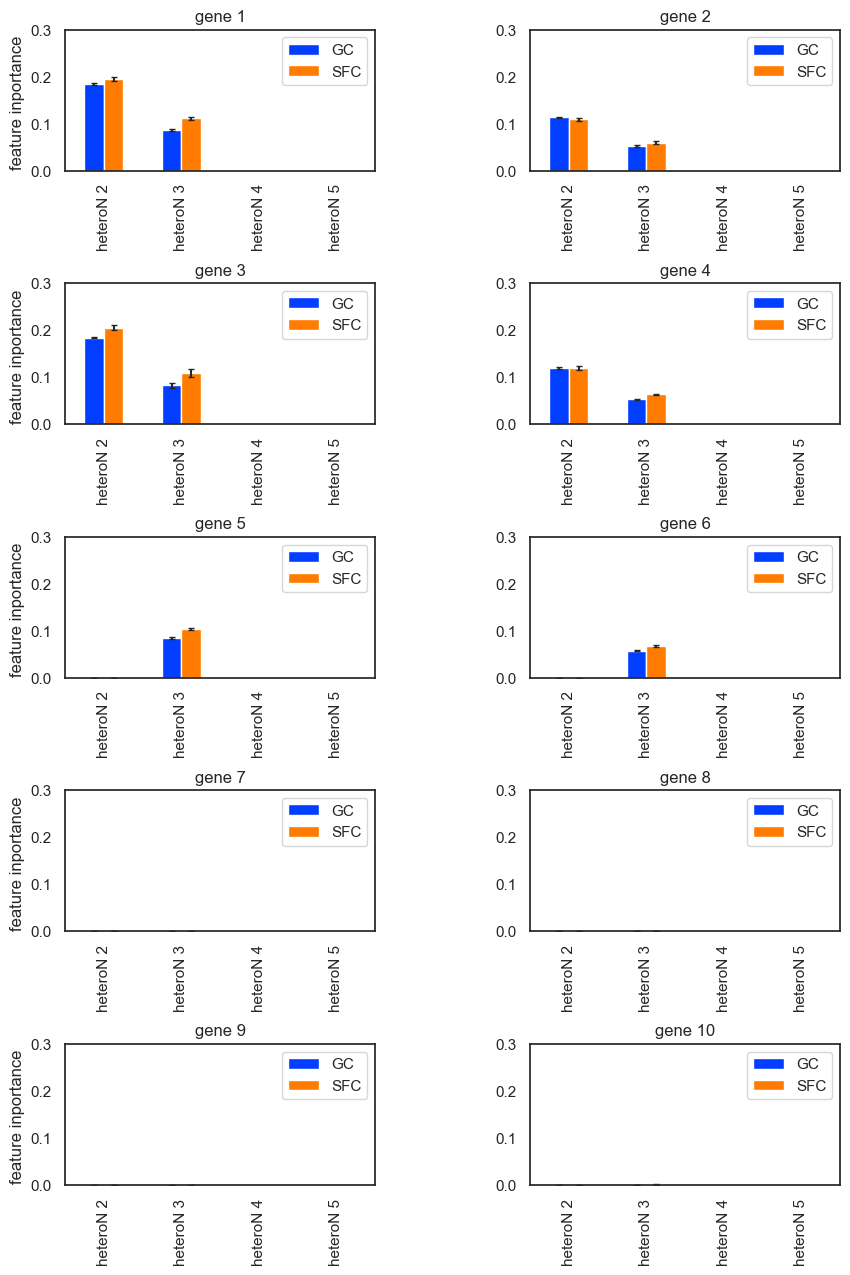

In [12]:
# place blank dataframe
df_gene1_mean = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene1_std = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene2_mean = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene2_std = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene3_mean = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene3_std = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene4_mean = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene4_std = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene5_mean = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene5_std = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene6_mean = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene6_std = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene7_mean = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene7_std = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene8_mean = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene8_std = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene9_mean = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene9_std = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene10_mean = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])
df_gene10_std = pd.DataFrame(index=df_importance_SFC_mean.columns, columns=['GC', 'SFC'])

# data insertion
df_gene1_mean['GC']=df_importance_GC_mean.loc['gene 1',:]
df_gene1_std['GC']=df_importance_GC_std.loc['gene 1',:]
df_gene1_mean['SFC']=df_importance_SFC_mean.loc['gene 1',:]
df_gene1_std['SFC']=df_importance_SFC_std.loc['gene 1',:]

df_gene2_mean['GC']=df_importance_GC_mean.loc['gene 2',:]
df_gene2_std['GC']=df_importance_GC_std.loc['gene 2',:]
df_gene2_mean['SFC']=df_importance_SFC_mean.loc['gene 2',:]
df_gene2_std['SFC']=df_importance_SFC_std.loc['gene 2',:]

df_gene3_mean['GC']=df_importance_GC_mean.loc['gene 3',:]
df_gene3_std['GC']=df_importance_GC_std.loc['gene 3',:]
df_gene3_mean['SFC']=df_importance_SFC_mean.loc['gene 3',:]
df_gene3_std['SFC']=df_importance_SFC_std.loc['gene 3',:]

df_gene4_mean['GC']=df_importance_GC_mean.loc['gene 4',:]
df_gene4_std['GC']=df_importance_GC_std.loc['gene 4',:]
df_gene4_mean['SFC']=df_importance_SFC_mean.loc['gene 4',:]
df_gene4_std['SFC']=df_importance_SFC_std.loc['gene 4',:]

df_gene5_mean['GC']=df_importance_GC_mean.loc['gene 5',:]
df_gene5_std['GC']=df_importance_GC_std.loc['gene 5',:]
df_gene5_mean['SFC']=df_importance_SFC_mean.loc['gene 5',:]
df_gene5_std['SFC']=df_importance_SFC_std.loc['gene 5',:]

df_gene6_mean['GC']=df_importance_GC_mean.loc['gene 6',:]
df_gene6_std['GC']=df_importance_GC_std.loc['gene 6',:]
df_gene6_mean['SFC']=df_importance_SFC_mean.loc['gene 6',:]
df_gene6_std['SFC']=df_importance_SFC_std.loc['gene 6',:]

df_gene7_mean['GC']=df_importance_GC_mean.loc['gene 7',:]
df_gene7_std['GC']=df_importance_GC_std.loc['gene 7',:]
df_gene7_mean['SFC']=df_importance_SFC_mean.loc['gene 7',:]
df_gene7_std['SFC']=df_importance_SFC_std.loc['gene 7',:]

df_gene8_mean['GC']=df_importance_GC_mean.loc['gene 8',:]
df_gene8_std['GC']=df_importance_GC_std.loc['gene 8',:]
df_gene8_mean['SFC']=df_importance_SFC_mean.loc['gene 8',:]
df_gene8_std['SFC']=df_importance_SFC_std.loc['gene 8',:]

df_gene9_mean['GC']=df_importance_GC_mean.loc['gene 9',:]
df_gene9_std['GC']=df_importance_GC_std.loc['gene 9',:]
df_gene9_mean['SFC']=df_importance_SFC_mean.loc['gene 9',:]
df_gene9_std['SFC']=df_importance_SFC_std.loc['gene 9',:]

df_gene10_mean['GC']=df_importance_GC_mean.loc['gene 10',:]
df_gene10_std['GC']=df_importance_GC_std.loc['gene 10',:]
df_gene10_mean['SFC']=df_importance_SFC_mean.loc['gene 10',:]
df_gene10_std['SFC']=df_importance_SFC_std.loc['gene 10',:]

# plot
fig, ax = plt.subplots(5,2, figsize=(10,15))
fig.subplots_adjust(hspace=0.8, wspace=0.5)
df_gene1_mean.plot.bar(ax=ax[0,0],yerr=df_gene1_std,capsize = 2., title='gene 1', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene2_mean.plot.bar(ax=ax[0,1],yerr=df_gene2_std,capsize = 2., title='gene 2', ylim=([0, 0.3]))
df_gene3_mean.plot.bar(ax=ax[1,0],yerr=df_gene3_std,capsize = 2., title='gene 3', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene4_mean.plot.bar(ax=ax[1,1],yerr=df_gene4_std,capsize = 2., title='gene 4', ylim=([0, 0.3]))
df_gene5_mean.plot.bar(ax=ax[2,0],yerr=df_gene5_std,capsize = 2., title='gene 5', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene6_mean.plot.bar(ax=ax[2,1],yerr=df_gene6_std,capsize = 2., title='gene 6', ylim=([0, 0.3]))
df_gene7_mean.plot.bar(ax=ax[3,0],yerr=df_gene7_std,capsize = 2., title='gene 7', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene8_mean.plot.bar(ax=ax[3,1],yerr=df_gene8_std,capsize = 2., title='gene 8', ylim=([0, 0.3]))
df_gene9_mean.plot.bar(ax=ax[4,0],yerr=df_gene9_std,capsize = 2., title='gene 9', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene10_mean.plot.bar(ax=ax[4,1],yerr=df_gene10_std,capsize = 2., title='gene 10', ylim=([0, 0.3]))
plt.show()

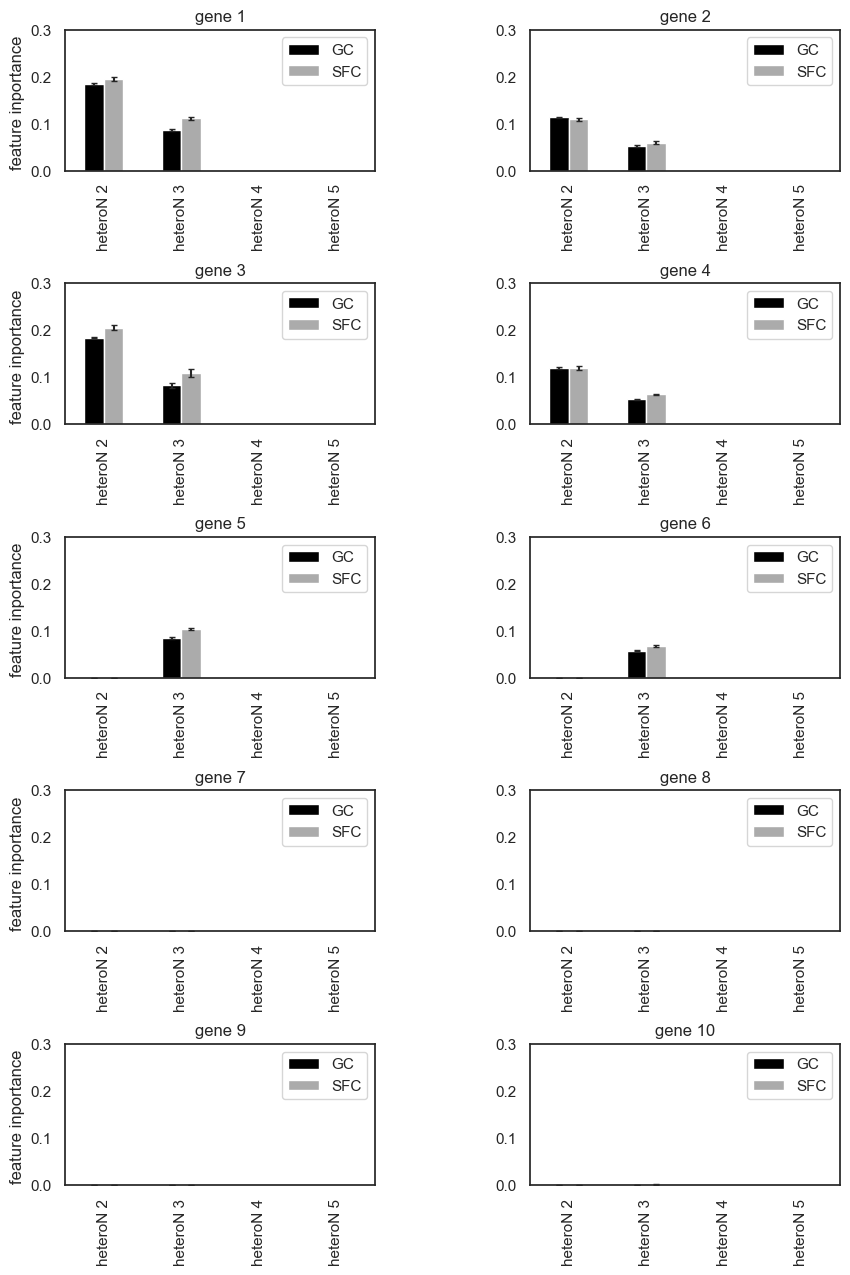

In [14]:
sns.set_palette(['#000000', '#ABABAB'])
# place blank dataframe
# plot
fig, ax = plt.subplots(5,2, figsize=(10,15))
fig.subplots_adjust(hspace=0.8, wspace=0.5)
df_gene1_mean.plot.bar(ax=ax[0,0],yerr=df_gene1_std,capsize = 2., title='gene 1', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene2_mean.plot.bar(ax=ax[0,1],yerr=df_gene2_std,capsize = 2., title='gene 2', ylim=([0, 0.3]))
df_gene3_mean.plot.bar(ax=ax[1,0],yerr=df_gene3_std,capsize = 2., title='gene 3', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene4_mean.plot.bar(ax=ax[1,1],yerr=df_gene4_std,capsize = 2., title='gene 4', ylim=([0, 0.3]))
df_gene5_mean.plot.bar(ax=ax[2,0],yerr=df_gene5_std,capsize = 2., title='gene 5', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene6_mean.plot.bar(ax=ax[2,1],yerr=df_gene6_std,capsize = 2., title='gene 6', ylim=([0, 0.3]))
df_gene7_mean.plot.bar(ax=ax[3,0],yerr=df_gene7_std,capsize = 2., title='gene 7', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene8_mean.plot.bar(ax=ax[3,1],yerr=df_gene8_std,capsize = 2., title='gene 8', ylim=([0, 0.3]))
df_gene9_mean.plot.bar(ax=ax[4,0],yerr=df_gene9_std,capsize = 2., title='gene 9', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene10_mean.plot.bar(ax=ax[4,1],yerr=df_gene10_std,capsize = 2., title='gene 10', ylim=([0, 0.3]))
plt.show()

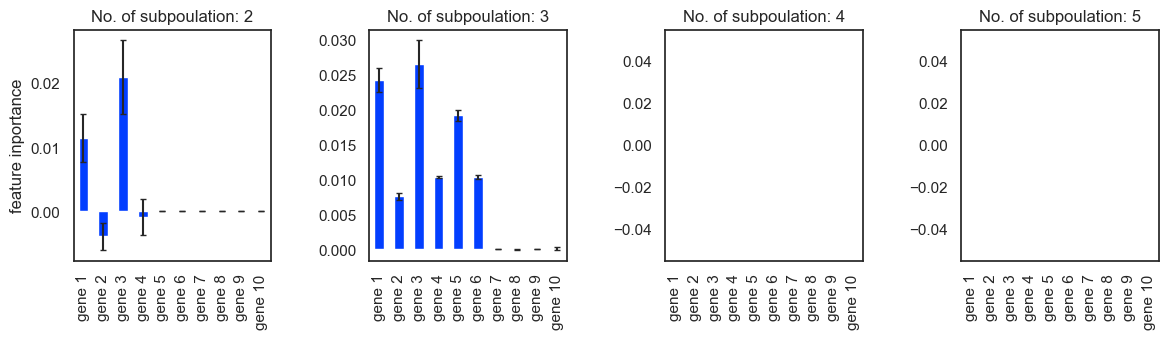

In [15]:
sns.set_palette('bright')
heterogeneity_list
fig,ax=plt.subplots(1,len(heterogeneity_list), figsize=(14,3))
fig.subplots_adjust(hspace=1.0, wspace=0.5)
for k, hetN in enumerate(heterogeneity_list):
    df_importance_Diff_mean.loc['gene 1':'gene 10',f"heteroN {hetN}"].T.plot.bar(ax=ax[k],yerr=df_importance_Diff_std.loc['gene 1':'gene 10',f"heteroN {hetN}"].T,capsize = 2.,
                                                                                 title= f"No. of subpoulation: {hetN}",
                                                                                 ylabel='feature inportance'if k==0 else None   )

In [16]:
acc_th = (1./3.)*1.5

df_importance_GC_mean2 = pd.DataFrame(columns = heteroN, index = feature_names)
df_importance_GC_std2 = pd.DataFrame(columns = heteroN, index = feature_names)
df_importance_SFC_mean2 = pd.DataFrame(columns = heteroN, index = feature_names)
df_importance_SFC_std2 = pd.DataFrame(columns = heteroN, index = feature_names)
df_importance_Diff_mean2 = pd.DataFrame(columns = heteroN, index = feature_names)
df_importance_Diff_std2 = pd.DataFrame(columns = heteroN, index = feature_names)
# df_acc2 = pd.DataFrame(columns=CV_names, index=['GC','SFC'])
# df_importance_GC2 = pd.DataFrame(columns=CV_names, index=feature_names)
# df_importance_SFC2 = pd.DataFrame(columns=CV_names, index=feature_names)
# df_importance_Diff2 = pd.DataFrame(columns=CV_names, index=feature_names)    

for spN_id, n_subpopulation in tqdm(enumerate(heterogeneity_list), total=len(heterogeneity_list)):
    print(spN_id)
    df_acc2 = pd.DataFrame(array_acc[:,:,spN_id],columns=CV_names, index=['GC','SFC'])
    df_importance_GC2 = pd.DataFrame(array_importance_GC[:,:,spN_id], columns=CV_names, index=feature_names)
    df_importance_SFC2 = pd.DataFrame(array_importance_SFC[:,:,spN_id], columns=CV_names, index=feature_names)
    df_importance_Diff2 = pd.DataFrame(array_importance_Diff[:,:,spN_id], columns=CV_names, index=feature_names)    

    df_importance_GC_mean2[heteroN[spN_id]] = df_importance_GC2.loc[:,(df_acc2>=acc_th).sum(axis=0)==2].mean(axis=1)
    df_importance_GC_std2[heteroN[spN_id]]  = df_importance_GC2.loc[:,(df_acc2>=acc_th).sum(axis=0)==2].std(axis=1)
    df_importance_SFC_mean2[heteroN[spN_id]]= df_importance_SFC2.loc[:,(df_acc2>=acc_th).sum(axis=0)==2].mean(axis=1)
    df_importance_SFC_std2[heteroN[spN_id]] = df_importance_SFC2.loc[:,(df_acc2>=acc_th).sum(axis=0)==2].std(axis=1)
    df_importance_Diff_mean2[heteroN[spN_id]]= df_importance_Diff2.loc[:,(df_acc2>=acc_th).sum(axis=0)==2].mean(axis=1)
    df_importance_Diff_std2[heteroN[spN_id]] = df_importance_Diff2.loc[:,(df_acc2>=acc_th).sum(axis=0)==2].std(axis=1)
    del df_acc2,df_importance_GC2,df_importance_SFC2

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 38.12it/s]

0
1
2
3


In [17]:
heteroN[spN_id]

'heteroN 5'

In [18]:
array_importance_GC[:,:,3]

array([[2.56766384e-02, 2.10548628e-02, 2.28991792e-02, 2.42945145e-02,
        1.97377566e-02],
       [1.52861471e-02, 1.35842414e-02, 1.26559236e-02, 1.34901082e-02,
        1.36762746e-02],
       [2.51851167e-02, 2.30716284e-02, 2.62886434e-02, 2.84761256e-02,
        2.45034440e-02],
       ...,
       [8.66751279e-06, 1.34037247e-05, 1.07056636e-06, 2.93074529e-05,
        3.29199604e-05],
       [9.63683761e-06, 1.41965850e-05, 2.52578924e-05, 3.02971152e-05,
        8.48717338e-06],
       [5.73258189e-05, 1.81789000e-05, 9.92141912e-06, 0.00000000e+00,
        2.57747340e-05]])

In [19]:
df_importance_SFC_mean2

heteroN 2  heteroN 3  heteroN 4  heteroN 5
gene 1       0.195293   0.117458   0.060206   0.035730
gene 2       0.109781   0.061713   0.036320   0.017077
gene 3       0.205409   0.110640   0.062788   0.041490
gene 4       0.118651   0.065660   0.039600   0.036984
gene 5       0.000018   0.104591   0.074401   0.051537
...               ...        ...        ...        ...
gene 19994   0.000023   0.000037   0.000103   0.000031
gene 19995   0.000005   0.000015   0.000020   0.000000
gene 19996   0.000019   0.000005   0.000106   0.000000
gene 19997   0.000003   0.000000   0.000032   0.000000
gene 19998   0.000167   0.000000   0.000000   0.000000

[19998 rows x 4 columns]

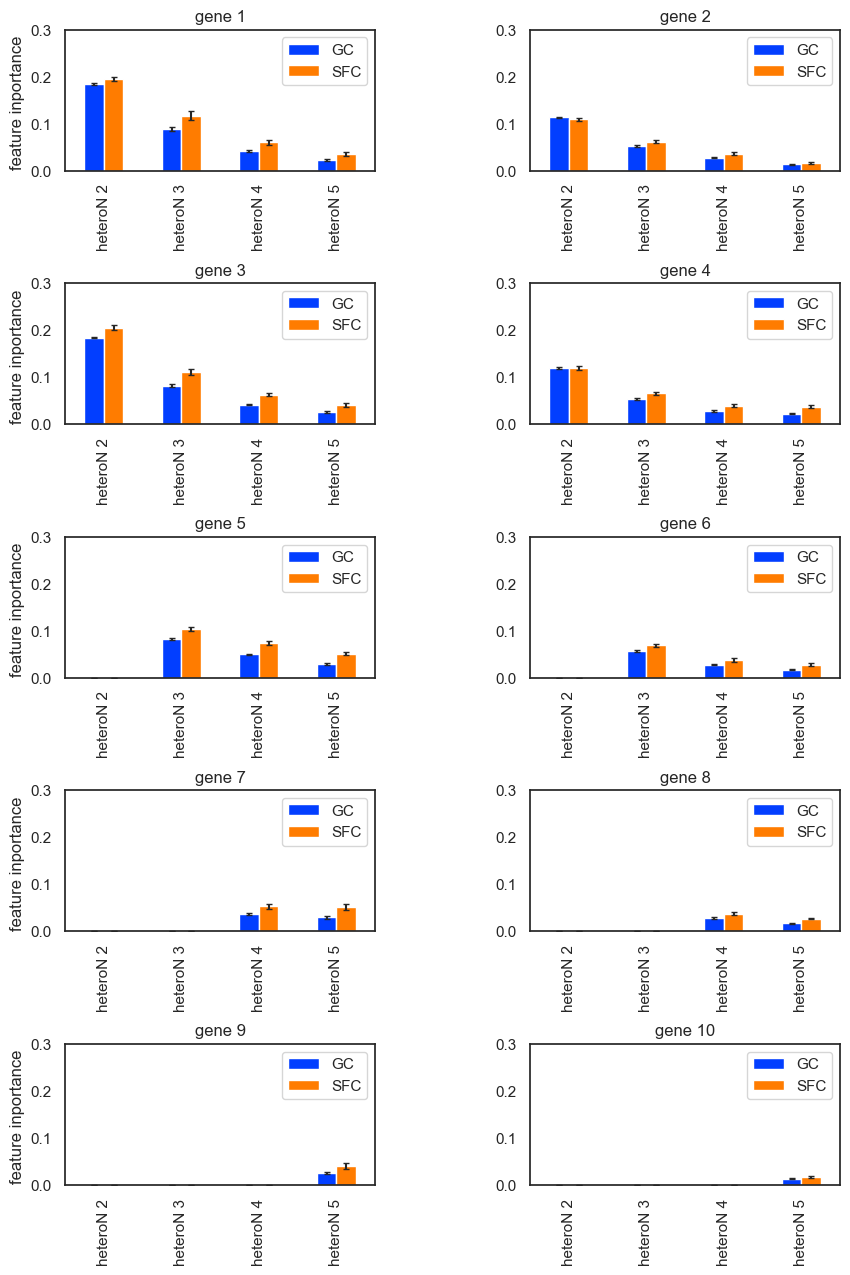

In [20]:
# place blank dataframe
df_gene1_mean = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene1_std = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene2_mean = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene2_std = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene3_mean = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene3_std = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene4_mean = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene4_std = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene5_mean = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene5_std = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene6_mean = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene6_std = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene7_mean = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene7_std = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene8_mean = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene8_std = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene9_mean = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene9_std = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene10_mean = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])
df_gene10_std = pd.DataFrame(index=df_importance_SFC_mean2.columns, columns=['GC', 'SFC'])

# data insertion
df_gene1_mean['GC']=df_importance_GC_mean2.loc['gene 1',:]
df_gene1_std['GC']=df_importance_GC_std2.loc['gene 1',:]
df_gene1_mean['SFC']=df_importance_SFC_mean2.loc['gene 1',:]
df_gene1_std['SFC']=df_importance_SFC_std2.loc['gene 1',:]

df_gene2_mean['GC']=df_importance_GC_mean2.loc['gene 2',:]
df_gene2_std['GC']=df_importance_GC_std2.loc['gene 2',:]
df_gene2_mean['SFC']=df_importance_SFC_mean2.loc['gene 2',:]
df_gene2_std['SFC']=df_importance_SFC_std2.loc['gene 2',:]

df_gene3_mean['GC']=df_importance_GC_mean2.loc['gene 3',:]
df_gene3_std['GC']=df_importance_GC_std2.loc['gene 3',:]
df_gene3_mean['SFC']=df_importance_SFC_mean2.loc['gene 3',:]
df_gene3_std['SFC']=df_importance_SFC_std2.loc['gene 3',:]

df_gene4_mean['GC']=df_importance_GC_mean2.loc['gene 4',:]
df_gene4_std['GC']=df_importance_GC_std2.loc['gene 4',:]
df_gene4_mean['SFC']=df_importance_SFC_mean2.loc['gene 4',:]
df_gene4_std['SFC']=df_importance_SFC_std2.loc['gene 4',:]

df_gene5_mean['GC']=df_importance_GC_mean2.loc['gene 5',:]
df_gene5_std['GC']=df_importance_GC_std2.loc['gene 5',:]
df_gene5_mean['SFC']=df_importance_SFC_mean2.loc['gene 5',:]
df_gene5_std['SFC']=df_importance_SFC_std2.loc['gene 5',:]

df_gene6_mean['GC']=df_importance_GC_mean2.loc['gene 6',:]
df_gene6_std['GC']=df_importance_GC_std2.loc['gene 6',:]
df_gene6_mean['SFC']=df_importance_SFC_mean2.loc['gene 6',:]
df_gene6_std['SFC']=df_importance_SFC_std2.loc['gene 6',:]

df_gene7_mean['GC']=df_importance_GC_mean2.loc['gene 7',:]
df_gene7_std['GC']=df_importance_GC_std2.loc['gene 7',:]
df_gene7_mean['SFC']=df_importance_SFC_mean2.loc['gene 7',:]
df_gene7_std['SFC']=df_importance_SFC_std2.loc['gene 7',:]

df_gene8_mean['GC']=df_importance_GC_mean2.loc['gene 8',:]
df_gene8_std['GC']=df_importance_GC_std2.loc['gene 8',:]
df_gene8_mean['SFC']=df_importance_SFC_mean2.loc['gene 8',:]
df_gene8_std['SFC']=df_importance_SFC_std2.loc['gene 8',:]

df_gene9_mean['GC']=df_importance_GC_mean2.loc['gene 9',:]
df_gene9_std['GC']=df_importance_GC_std2.loc['gene 9',:]
df_gene9_mean['SFC']=df_importance_SFC_mean2.loc['gene 9',:]
df_gene9_std['SFC']=df_importance_SFC_std2.loc['gene 9',:]

df_gene10_mean['GC']=df_importance_GC_mean2.loc['gene 10',:]
df_gene10_std['GC']=df_importance_GC_std2.loc['gene 10',:]
df_gene10_mean['SFC']=df_importance_SFC_mean2.loc['gene 10',:]
df_gene10_std['SFC']=df_importance_SFC_std2.loc['gene 10',:]

# plot
fig, ax = plt.subplots(5,2, figsize=(10,15))
fig.subplots_adjust(hspace=0.8, wspace=0.5)
df_gene1_mean.plot.bar(ax=ax[0,0],yerr=df_gene1_std,capsize = 2., title='gene 1', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene2_mean.plot.bar(ax=ax[0,1],yerr=df_gene2_std,capsize = 2., title='gene 2', ylim=([0, 0.3]))
df_gene3_mean.plot.bar(ax=ax[1,0],yerr=df_gene3_std,capsize = 2., title='gene 3', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene4_mean.plot.bar(ax=ax[1,1],yerr=df_gene4_std,capsize = 2., title='gene 4', ylim=([0, 0.3]))
df_gene5_mean.plot.bar(ax=ax[2,0],yerr=df_gene5_std,capsize = 2., title='gene 5', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene6_mean.plot.bar(ax=ax[2,1],yerr=df_gene6_std,capsize = 2., title='gene 6', ylim=([0, 0.3]))
df_gene7_mean.plot.bar(ax=ax[3,0],yerr=df_gene7_std,capsize = 2., title='gene 7', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene8_mean.plot.bar(ax=ax[3,1],yerr=df_gene8_std,capsize = 2., title='gene 8', ylim=([0, 0.3]))
df_gene9_mean.plot.bar(ax=ax[4,0],yerr=df_gene9_std,capsize = 2., title='gene 9', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene10_mean.plot.bar(ax=ax[4,1],yerr=df_gene10_std,capsize = 2., title='gene 10', ylim=([0, 0.3]))
plt.show()

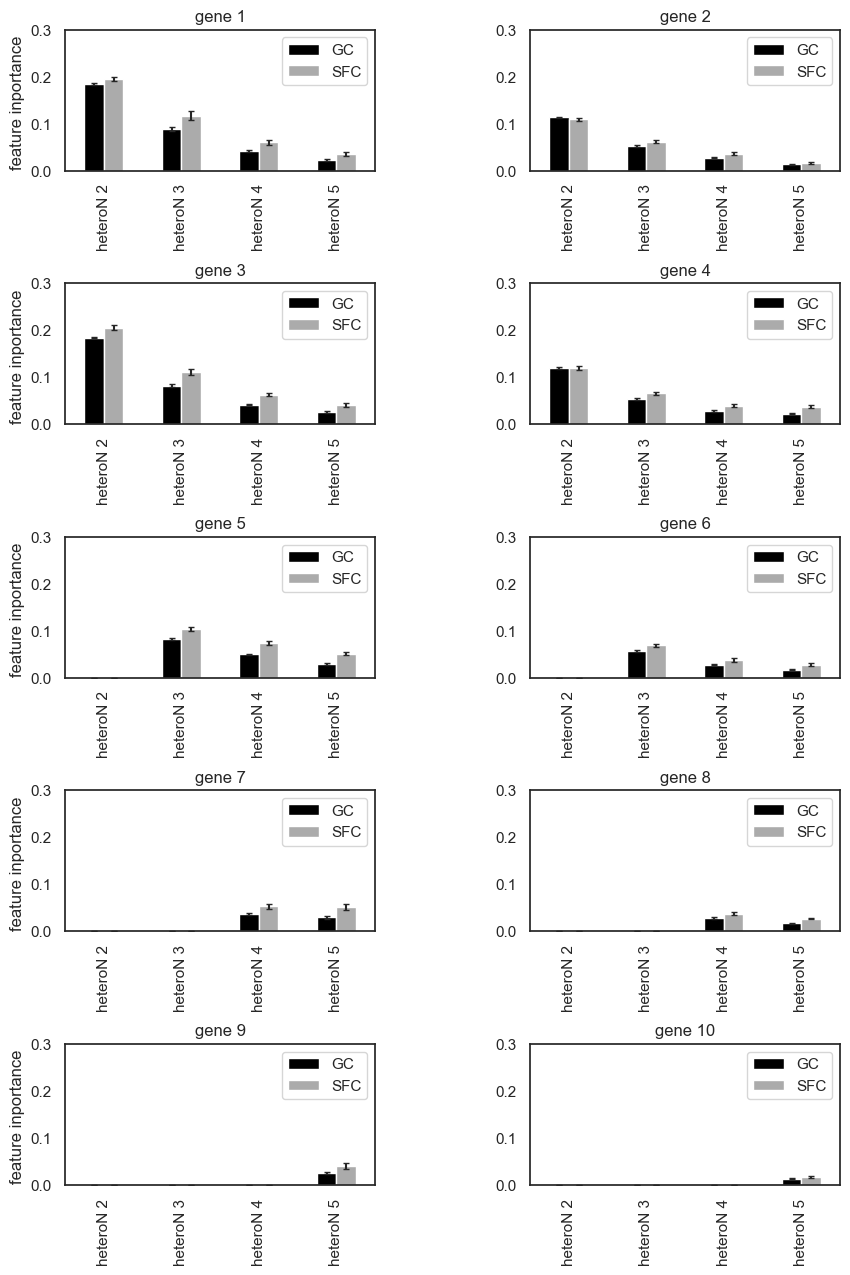

In [21]:
sns.set_palette(['#000000', '#ABABAB'])
# place blank dataframe
# plot
fig, ax = plt.subplots(5,2, figsize=(10,15))
fig.subplots_adjust(hspace=0.8, wspace=0.5)
df_gene1_mean.plot.bar(ax=ax[0,0],yerr=df_gene1_std,capsize = 2., title='gene 1', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene2_mean.plot.bar(ax=ax[0,1],yerr=df_gene2_std,capsize = 2., title='gene 2', ylim=([0, 0.3]))
df_gene3_mean.plot.bar(ax=ax[1,0],yerr=df_gene3_std,capsize = 2., title='gene 3', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene4_mean.plot.bar(ax=ax[1,1],yerr=df_gene4_std,capsize = 2., title='gene 4', ylim=([0, 0.3]))
df_gene5_mean.plot.bar(ax=ax[2,0],yerr=df_gene5_std,capsize = 2., title='gene 5', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene6_mean.plot.bar(ax=ax[2,1],yerr=df_gene6_std,capsize = 2., title='gene 6', ylim=([0, 0.3]))
df_gene7_mean.plot.bar(ax=ax[3,0],yerr=df_gene7_std,capsize = 2., title='gene 7', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene8_mean.plot.bar(ax=ax[3,1],yerr=df_gene8_std,capsize = 2., title='gene 8', ylim=([0, 0.3]))
df_gene9_mean.plot.bar(ax=ax[4,0],yerr=df_gene9_std,capsize = 2., title='gene 9', ylabel='feature inportance ', ylim=([0, 0.3]))
df_gene10_mean.plot.bar(ax=ax[4,1],yerr=df_gene10_std,capsize = 2., title='gene 10', ylim=([0, 0.3]))
plt.show()

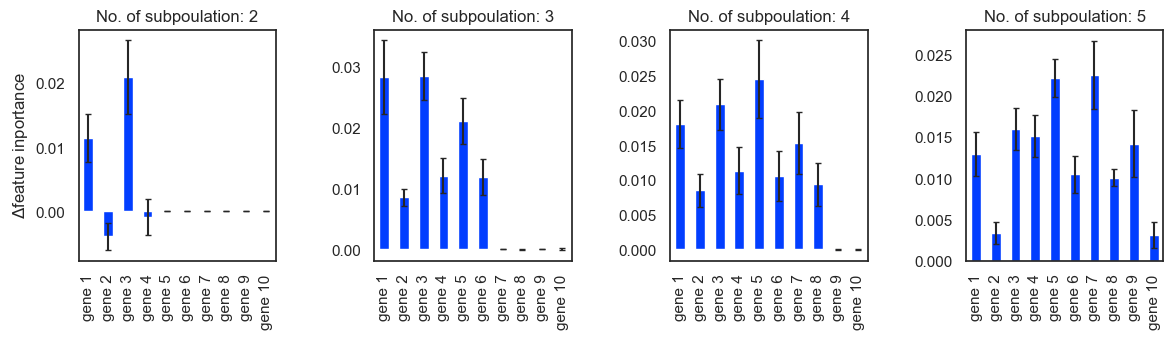

In [22]:
sns.set_palette('bright')
heterogeneity_list
fig,ax=plt.subplots(1,len(heterogeneity_list), figsize=(14,3))
fig.subplots_adjust(hspace=1.0, wspace=0.5)
for k, hetN in enumerate(heterogeneity_list):
    df_importance_Diff_mean2.loc['gene 1':'gene 10',f"heteroN {hetN}"].T.plot.bar(ax=ax[k],yerr=df_importance_Diff_std2.loc['gene 1':'gene 10',f"heteroN {hetN}"].T,capsize = 2.,
                                                                                 title= f"No. of subpoulation: {hetN}",
                                                                                 ylabel='$\Delta$feature inportance'if k==0 else None   )